### Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import SGD
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### Data loading and preparation

In [2]:
ROOT_DIR = 'Breast_Cancer'
IN_GOOGLE_COLAB = True

if IN_GOOGLE_COLAB:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')

    # change the current working directory
    %cd gdrive/'My Drive'

    # create a root directory if there's none
    if not os.path.isdir(ROOT_DIR):
        %mkdir $ROOT_DIR

    # change the current working directory
    %cd $ROOT_DIR

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/My Drive/Breast_Cancer


In [3]:
data = pd.read_csv("breast-cancer-wisconsin.data")
data.replace('?', -99999, inplace=True)
data = data.drop(['1000025'], axis=1)
print(data.shape)
data

(698, 10)


,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


In [4]:
imp = SimpleImputer(missing_values=-99999, strategy="mean")
data = imp.fit_transform(data)
print(data.shape)
data

(698, 10)


array([[ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       [ 6.,  8.,  8., ...,  7.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]])

In [5]:
X = data[:, 0:-1]
X.shape

(698, 9)

In [6]:
Y = data[:, -1]
Y.shape

(698,)

In [7]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((558, 9), (140, 9), (558,), (140,))

### Model creating

In [10]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=X_train[0].shape))
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
Total params: 4,832
Trainable params: 4,832
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="Adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_split=0.15)

Epoch 1/30
15/15 [==============================] - 5s 58ms/step - loss: 3.5173 - accuracy: 0.1139 - val_loss: 2.5390 - val_accuracy: 0.3214
Epoch 2/30
15/15 [==============================] - 0s 13ms/step - loss: 2.0300 - accuracy: 0.3418 - val_loss: 1.5134 - val_accuracy: 0.3810
Epoch 3/30
15/15 [==============================] - 0s 26ms/step - loss: 1.1910 - accuracy: 0.6983 - val_loss: 0.8516 - val_accuracy: 0.8929
Epoch 4/30
15/15 [==============================] - 0s 19ms/step - loss: 0.6943 - accuracy: 0.8692 - val_loss: 0.5506 - val_accuracy: 0.8929
Epoch 5/30
15/15 [==============================] - 0s 24ms/step - loss: 0.4900 - accuracy: 0.8945 - val_loss: 0.4609 - val_accuracy: 0.8810
Epoch 6/30
15/15 [==============================] - 0s 14ms/step - loss: 0.4086 - accuracy: 0.8924 - val_loss: 0.4157 - val_accuracy: 0.8810
Epoch 7/30
15/15 [==============================] - 0s 17ms/step - loss: 0.3640 - accuracy: 0.8987 - val_loss: 0.3928 - val_accuracy: 0.8929
Epoch 8/30
15

### Evaluation

In [14]:
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)
print("Train Accuracy: %.2f%%" % (train_acc*100))
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (test_acc*100))

Train Accuracy: 97.49%
Test Accuracy: 96.43%


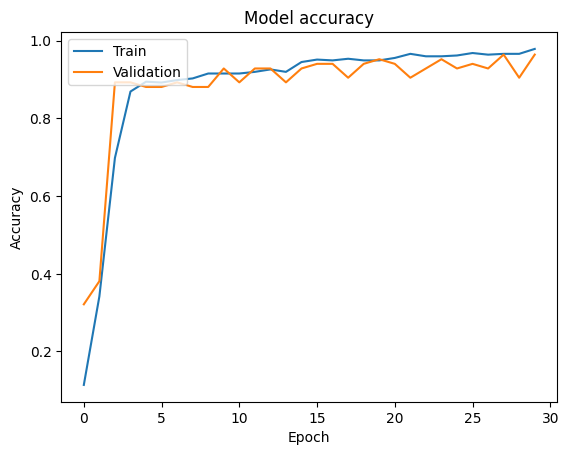

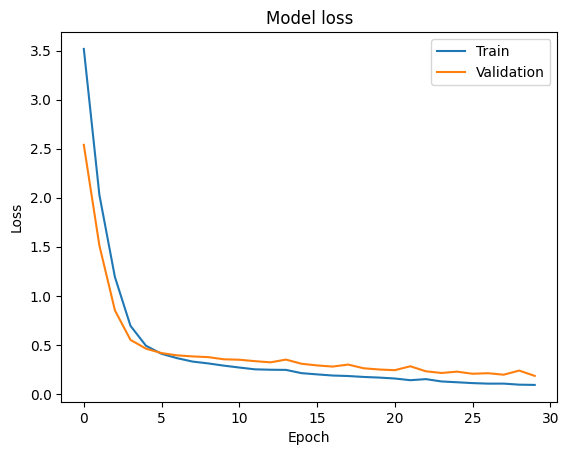

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

5/5 [==============================] - 0s 3ms/step
Accuracy: 0.9642857142857143
Precision: 0.9571490094745909
Recall: 0.967724168319013
F1 Score: 0.9619047619047618


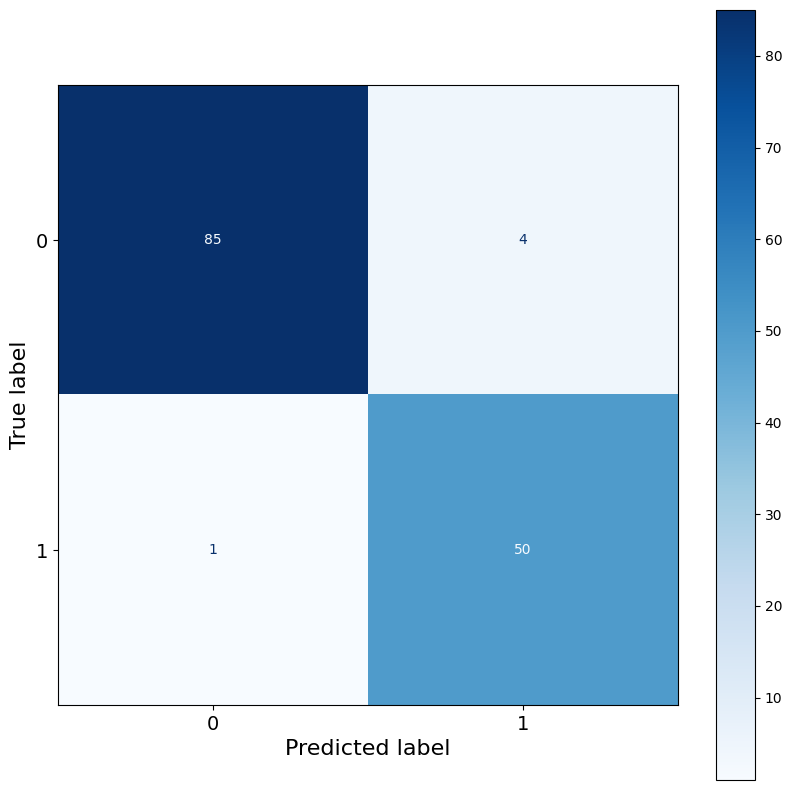

In [16]:
Y_pred = model.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
cm = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()